# Easy Visa : Machine Learning for Visa approval prediction

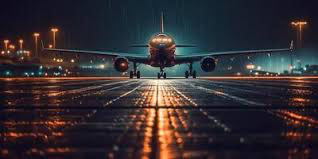

## (EDA+ Data Cleaning + Feature Engineering + Modelling + Predictions)

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

#### Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


In [3]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)


# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

from google.colab import drive
drive.mount('/content/drive')

In [6]:
# loading the dataset
data = pd.read_csv('C:\\Users\\abhilash.manchala\\Downloads\\EasyVisa.csv')

df = data.copy() #creating a copy of dataset

In [8]:
df.shape ## geting structure of data

(25480, 12)

In [10]:
df.head() # # displays first 5 rows of our dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [12]:
df.tail()  # displays last 5 rows of our dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Data Description(Brief information about the columns in dataset) :

* case_id: ID of each visa application
* continent: Information of continent of the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the * prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied

In [17]:
df.describe().T    # getting the statistical summary of all the numerical data

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


### Summary:

1. **no_of_employees**:
   - **High variability** (std: 22,877.93); range from -26 to 602,069, indicating a mix of small and large firms.
   - The minimum number of employees is -26, which might indicate data entry errors or businesses that had net negative employment (e.g., layoffs). The maximum is 602,069, showing that some firms are exceptionally larg

2. **yr_of_estab**:
   - Range: 1800 to 2016, suggesting historical diversity; most firms established between 1976 and 2005.

3. **prevailing_wage**:
   - **Mean**: 74,456; high variability (std: 52,815.94).
   - Range from 2.14 to 319,210.27, with many well-paying positions.

The dataset reflects a diverse mix of firm sizes, establishment years, and wage levels, with significant variability in employee counts and wages.

In [20]:
df.isnull().sum()  ## checking for null values in dataset

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [22]:
df = df.drop_duplicates(subset='case_id') #
#checking if the dataset contains any duplicate entries, particularly for the case_id, as it is a unique identifier.

In [24]:
df.nunique()  ## getting unique values in the dataset

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

# EDA 

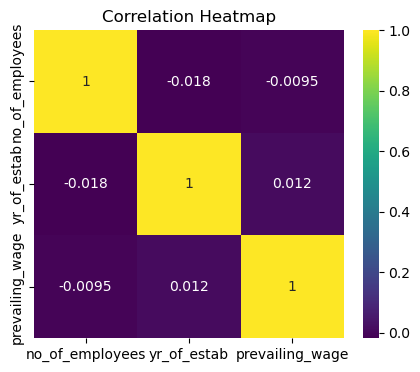

In [27]:
numerical_cols = df.select_dtypes(include=['number']).columns  # correlation for numerical data
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

We can observe that only a few columns are numerical, and they show little to no correlation, with weak relationships between them.

In [30]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

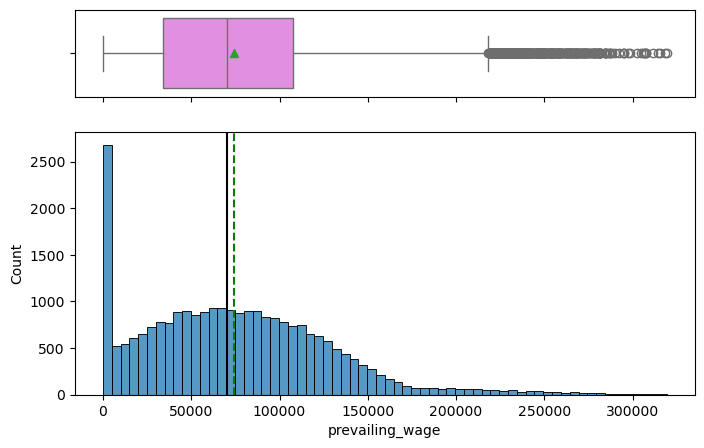

In [32]:
histogram_boxplot(df, "prevailing_wage")

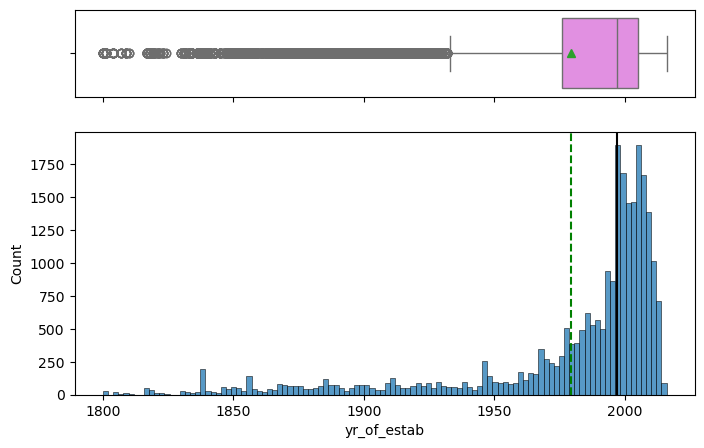

In [33]:
histogram_boxplot(df, "yr_of_estab")

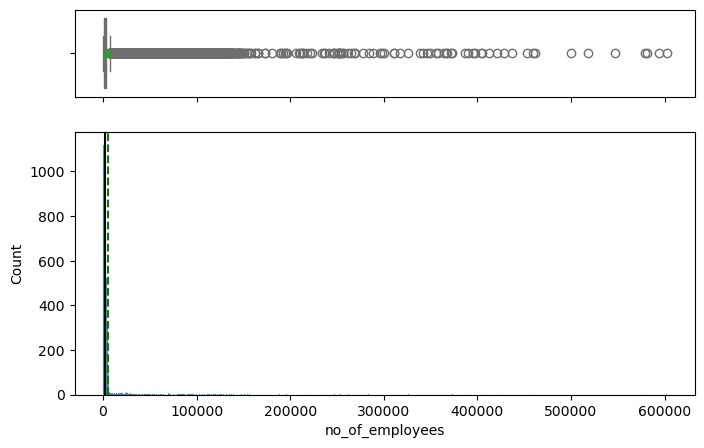

In [34]:
histogram_boxplot(df, "no_of_employees")

- We can see that the data in the wage column is heavily skewed to the right, indicating a significant disparity, with a few values being zero or negative, which may suggest possible data entry errors or typos. 
- In the year column, we observe that many firms were established in the late '90s, creating a left skew. 
- As for the number of employees, the data is extremely right-skewed, suggesting that most firms have a small number of employees.

# bivariate analysis

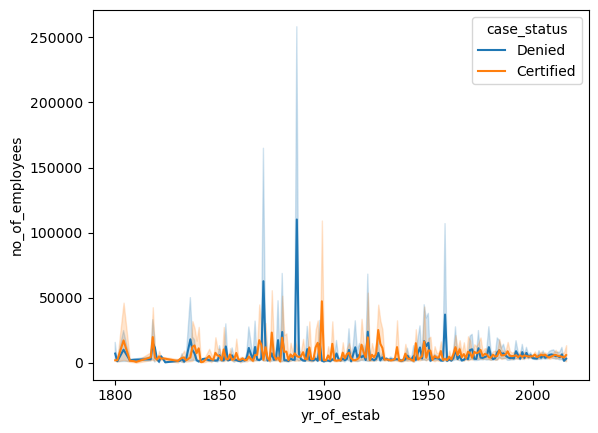

In [38]:
sns.lineplot(data=df, x='yr_of_estab', y='no_of_employees', hue='case_status')
plt.show()

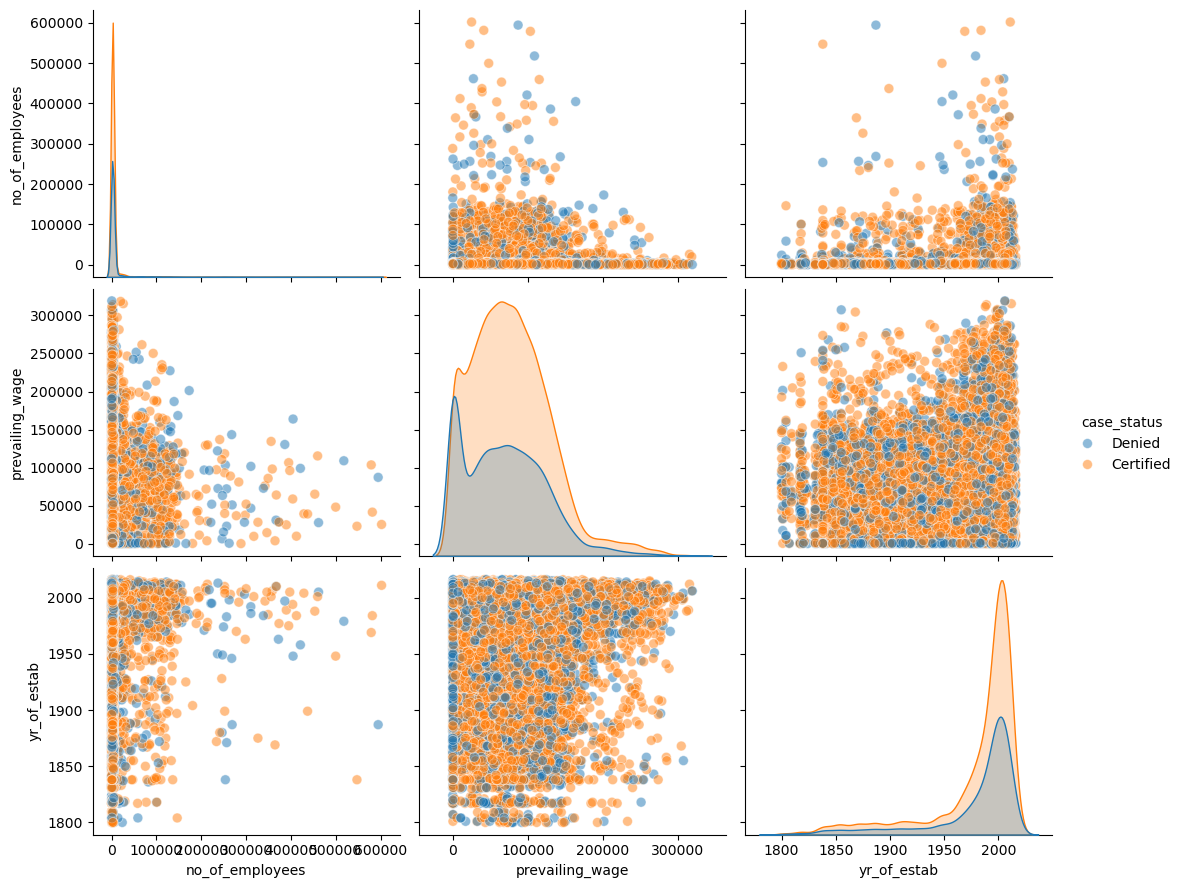

In [39]:
# Example usage of pairplot
sns.pairplot(df,
             hue='case_status',
             vars=['no_of_employees', 'prevailing_wage', 'yr_of_estab'],  # Only select few columns if needed
             kind='scatter',  # Scatter plot for the pairwise relationships
             diag_kind='kde',  # KDE plots on the diagonal
             height=3,  # Set height of each subplot
             aspect=1.2,  # Aspect ratio for each subplot
             markers='o',  # Circular markers for the scatter plot
             dropna=True,  # Drop rows with missing values
             plot_kws={'alpha': 0.5, 's': 50},  # Set transparency and size for scatter points
             diag_kws={'color': 'blue'})  # Set color for diagonal KDE)

# Display the plot
plt.show()

We can observe that most companies are startups or small firms, typically employing very few people, from the late 1980s to the present day.

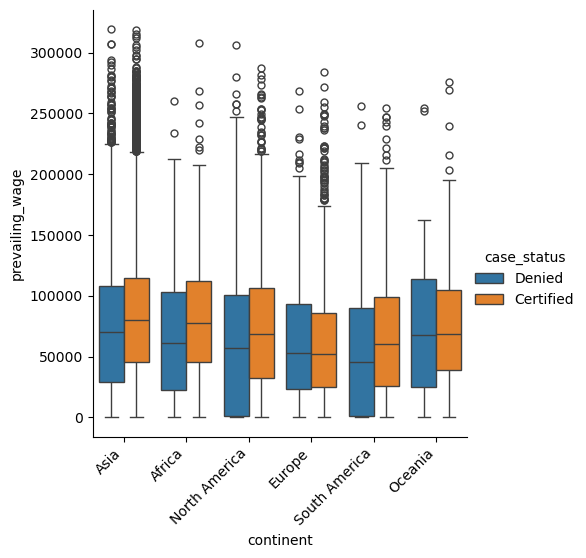

In [42]:
# Catplot for categorical vs. numerical (Boxplot)
sns.catplot(x='continent', y='prevailing_wage', hue = 'case_status', kind='box', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

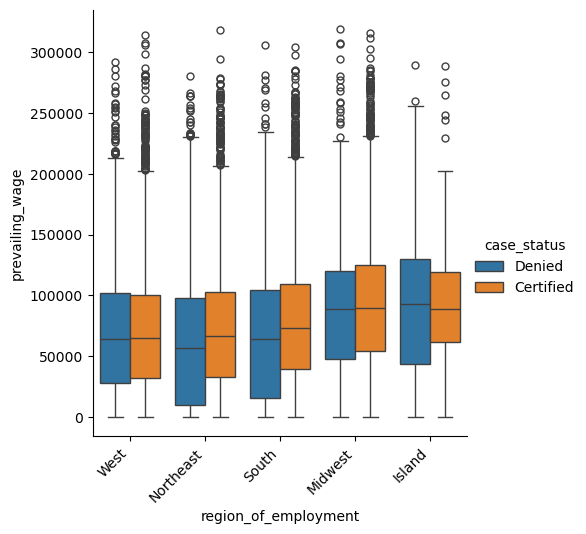

In [43]:
# Catplot for categorical vs. numerical (Boxplot)
sns.catplot(x='region_of_employment', y='prevailing_wage', hue = 'case_status', kind='box', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
def stacked_barplt(data, category_col1, category_col2, figsize=(8, 5), colors=None, title=None, xlabel=None, ylabel=None):
    """
    Create a stacked bar plot for two categorical columns in a DataFrame.

    Parameters:
    - data: DataFrame containing the data.
    - category_col1: Column name for the x-axis (primary category).
    - category_col2: Column name for the stack (secondary category).
    - figsize: Tuple defining the figure size.
    - colors: List of colors for the different categories in the stack (default is None, which will use default colors).
    - title: Title of the plot (optional).
    - xlabel: Label for the x-axis (optional).
    - ylabel: Label for the y-axis (optional).
    """
    # Create a contingency table (cross-tabulation) between the two categorical columns
    crosstab = pd.crosstab(data[category_col1], data[category_col2])

    # Create the stacked bar plot
    ax = crosstab.plot(kind='bar', stacked=True, figsize=figsize, color=colors)

    # Add title and labels if provided
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add legend
    ax.legend(title=category_col2, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to fit everything in
    plt.tight_layout()
    plt.show()

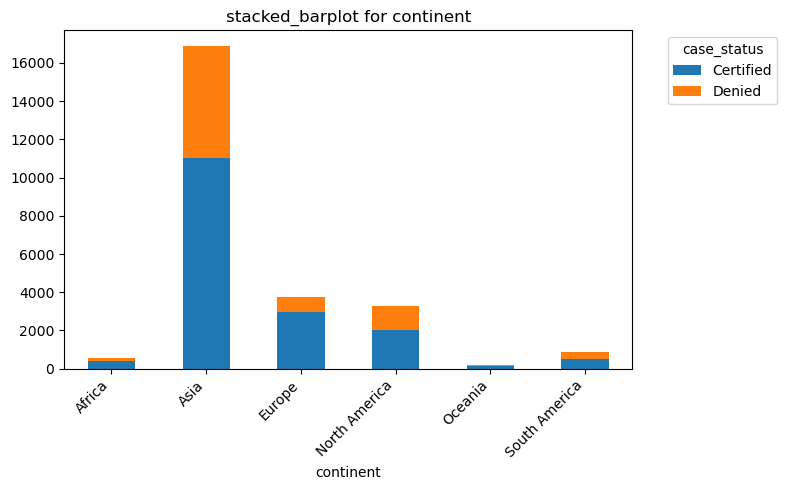

In [45]:
stacked_barplt(df, "continent", "case_status", title = 'stacked_barplot for continent')

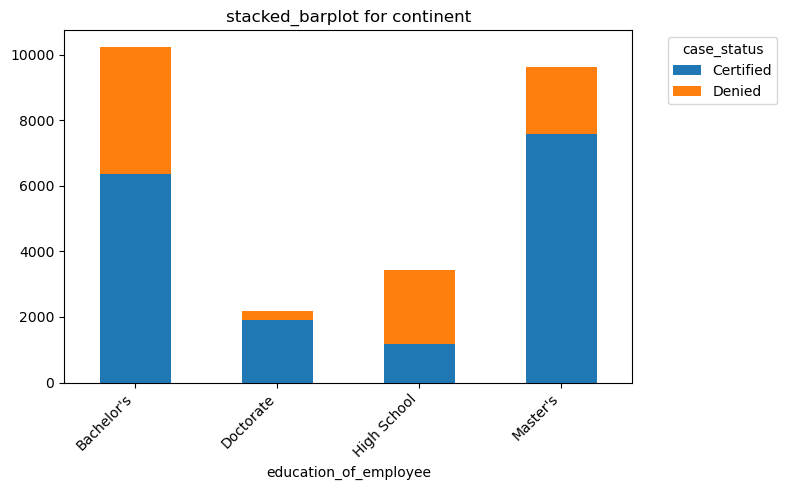

In [46]:
stacked_barplt(df, "education_of_employee", "case_status", title = 'stacked_barplot for continent')

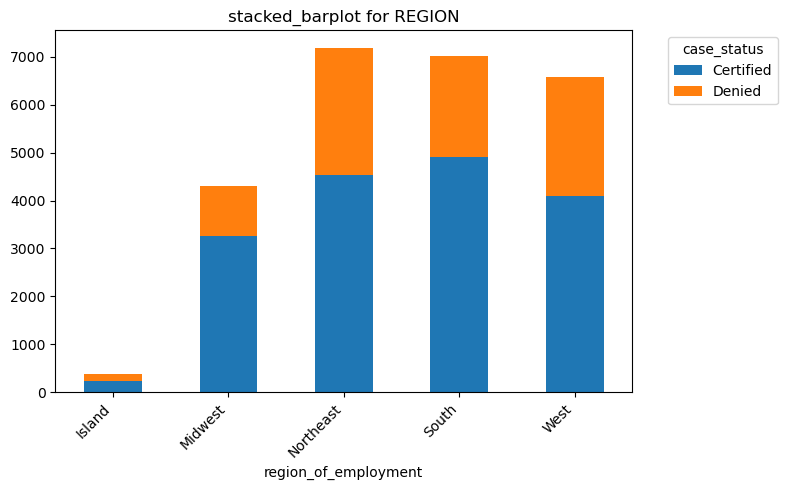

In [47]:
stacked_barplt(df, "region_of_employment", "case_status", title = 'stacked_barplot for REGION')

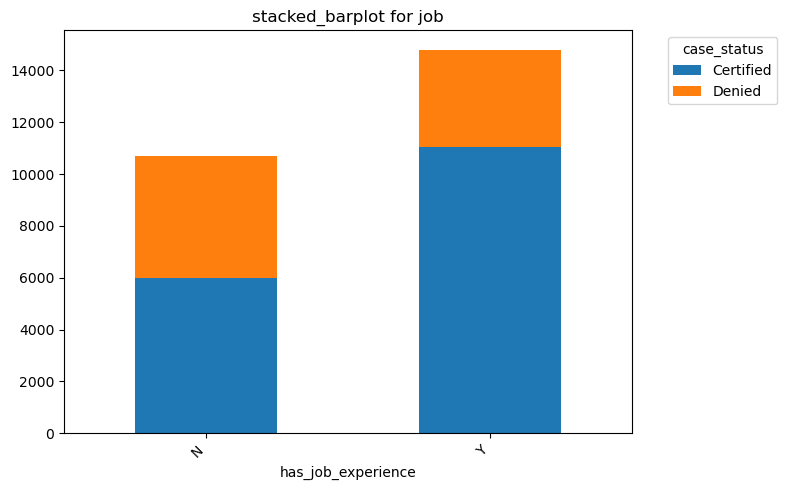

In [48]:
stacked_barplt(df, "has_job_experience", "case_status", title = 'stacked_barplot for job')

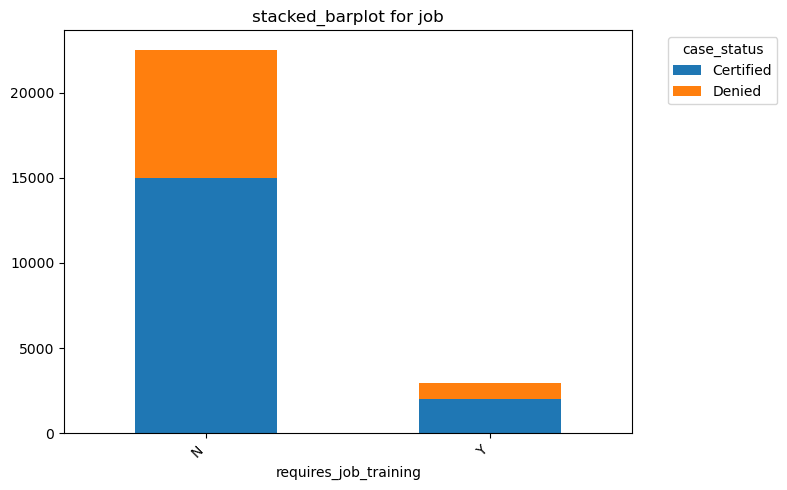

In [49]:
stacked_barplt(df, "requires_job_training", "case_status", title = 'stacked_barplot for job')

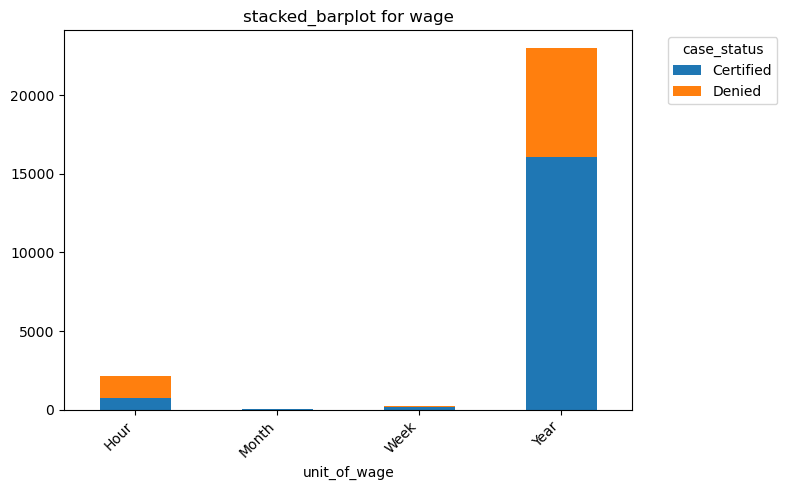

In [50]:
stacked_barplt(df, "unit_of_wage", "case_status", title = 'stacked_barplot for wage')

## Observations 

- Education seems to play a key role in model building, as individuals with more degrees have a higher chance of visa approval.
- Most firms pay on a yearly basis, so we can convert all other payment types into yearly income for consistency.
- Those with job experience have a higher chance of approval compared to those with no experience.
- Individuals who don’t require training have a higher approval rate than those who do.
- Employees from Asia are receiving higher approval rates, indicating strong demand in that region.
- Employment is significantly lower in island regions compared to other areas where employment is more prevalent.

## Feature Engineering:

Since we have a large number of categorical features, we can create and combine new ones to gain deeper insights. It will be useful to check whether these newly created features improve the model’s performance.

It's best to start with data preprocessing first. If there are missing or negative values, creating new features based on them could lead to invalid or misleading results. By handling issues like missing data, outliers, and negative values up front, we ensure that the features we create later are reliable and useful for the model. So, focus on cleaning and preprocessing the data before diving into feature engineering helps us much better.

In [55]:
#Calculate the median of the valid (positive) employees
median_wage = df[df['no_of_employees'] > 0]['no_of_employees'].median()

# Replace invalid (zero or negative) wages with the median wage
df['no_of_employees'] = df['no_of_employees'].apply(lambda x: median_wage if x <= 0 else x)

# Verify if the invalid values have been replaced
print(df['no_of_employees'].describe())  # This show no negative or zero values

count    25480.000
mean      5669.802
std      22877.372
min         12.000
25%       1028.000
50%       2112.000
75%       3504.000
max     602069.000
Name: no_of_employees, dtype: float64


In [57]:
# Convert to prevailing wage for different units on per year as standard
def convert_to_yearly(row):
    if row['unit_of_wage'] == 'Hour':
        return row['prevailing_wage'] * 40 * 52  # Hourly wage to yearly wage
    elif row['unit_of_wage'] == 'Week':
        return row['prevailing_wage'] * 52  # Weekly wage to yearly wage
    elif row['unit_of_wage'] == 'Month':
        return row['prevailing_wage'] * 12  # Monthly wage to yearly wage
    else:
        return row['prevailing_wage']  # Already yearly wage

df['prevailing_wage_per_year'] = df.apply(convert_to_yearly, axis=1)

In [58]:
df['avg_wage_continent'] = df.groupby('continent')['prevailing_wage_per_year'].transform('mean')   ## average wage of employee w.r.t continent

df['avg_wage_region'] = df.groupby('region_of_employment')['prevailing_wage_per_year'].transform('mean')    ## average wage of employee w.r.t region

In [59]:
# Current year (you can also use 2025 or get the year when data collected)
current_year = 2017

# Calculate years since establishment
df['years_since_establishment'] = current_year - df['yr_of_estab']

# Avoid division by zero if any company was established in the current year (i.e., years_since_establishment = 0)
df['average_increase_per_year_emp'] = df['no_of_employees'] / df['years_since_establishment']

# Handle potential division by zero
df['average_increase_per_year_emp'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Display the new column with average increase in employees per year
df[['yr_of_estab', 'no_of_employees', 'average_increase_per_year_emp']].head()

,yr_of_estab,no_of_employees,average_increase_per_year_emp
0,2007,14513.000,1451.300
1,2002,2412.000,160.800
2,2008,44444.000,4938.222
3,1897,98.000,0.817
4,2005,1082.000,90.167


In [74]:
df['education_of_employee'] = df['education_of_employee'].map({'High School': 0, "Bachelor's":1, "Master's": 2, "Doctorate":3})  #encoding

In [76]:
min_wages = df.groupby('region_of_employment')['prevailing_wage_per_year'].min().reset_index()  ## finding the minimum wage w.r.t region of employement

# Display the result
print(min_wages)

  region_of_employment  prevailing_wage_per_year
0               Island                  1985.300
1              Midwest                   100.000
2            Northeast                   115.810
3                South                   126.280
4                 West                   104.170


In [78]:
# Define the minimum wage for each region
minimum_wage_by_region = {
    'West': 104.170,
    'Island': 1985.300,
    'Midwest': 100.000,
    'Northeast': 115.810,
    'South': 126.280
}

# Map the minimum wage to the DataFrame based on the region
df['minimum_wage_in_region'] = df['region_of_employment'].map(minimum_wage_by_region)

# Calculate the wage disparity
df['wage_disparity'] = df['prevailing_wage_per_year'] - df['minimum_wage_in_region']

In [80]:
df['average_wage_per_employee'] = df.apply(
    lambda row: row['prevailing_wage_per_year'] / row['no_of_employees'] if row['no_of_employees'] != 0 else 0, axis=1
)            # creating new feature 

In [82]:
# Combine the categorical columns into one
df['education_experience_training_combo'] = (
    df['education_of_employee'].astype(str) + "_" +
    df['has_job_experience'] + "_" +
    df['requires_job_training']
)

# One-hot encode the combined column
df = pd.get_dummies(df, columns=['education_experience_training_combo'], prefix='combo')

# Rename the columns to the custom format 
# Creating a mapping for the new short column names
new_column_names = {
    'combo_0_N_N': 'ed_0_ex_N_Trn_N',
    'combo_0_N_Y': 'ed_0_ex_N_Trn_Y',
    'combo_0_Y_N': 'ed_0_ex_Y_Trn_N',
    'combo_0_Y_Y': 'ed_0_ex_Y_Trn_Y',
    'combo_1_N_N': 'ed_1_ex_N_Trn_N',
    'combo_1_N_Y': 'ed_1_ex_N_Trn_Y',
    'combo_1_Y_N': 'ed_1_ex_Y_Trn_N',
    'combo_1_Y_Y': 'ed_1_ex_Y_Trn_Y',
    'combo_2_N_N': 'ed_2_ex_N_Trn_N',
    'combo_2_N_Y': 'ed_2_ex_N_Trn_Y',
    'combo_2_Y_N': 'ed_2_ex_Y_Trn_N',
    'combo_2_Y_Y': 'ed_2_ex_Y_Trn_Y',
    'combo_3_N_N': 'ed_3_ex_N_Trn_N',
    'combo_3_N_Y': 'ed_3_ex_N_Trn_Y',
    'combo_3_Y_N': 'ed_3_ex_Y_Trn_N',
    'combo_3_Y_Y': 'ed_3_ex_Y_Trn_Y'
}

# Apply the new names to the columns
df.rename(columns=new_column_names, inplace=True)

# Show the resulting DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   case_id                        25480 non-null  object 
 1   continent                      25480 non-null  object 
 2   education_of_employee          25480 non-null  int64  
 3   has_job_experience             25480 non-null  object 
 4   requires_job_training          25480 non-null  object 
 5   no_of_employees                25480 non-null  float64
 6   yr_of_estab                    25480 non-null  int64  
 7   region_of_employment           25480 non-null  object 
 8   prevailing_wage                25480 non-null  float64
 9   unit_of_wage                   25480 non-null  object 
 10  full_time_position             25480 non-null  object 
 11  case_status                    25480 non-null  object 
 12  prevailing_wage_per_year       25480 non-null 


1. **`avg_wage_continent` & `avg_wage_region`**: 
   - These features provide context about regional wage trends by showing the average wage for employees based on continent and region. They help the model capture geographical wage differences and improve wage-related predictions.

2. **`years_since_establishment`**: 
   - This feature indicates how long a company has been in business, helping the model understand company maturity and growth patterns. Older companies might have different wage and employee dynamics compared to newer ones.

3. **`average_increase_per_year_emp`**: 
   - This feature calculates the average growth in employee numbers per year, helping the model identify rapidly growing companies versus stable or declining ones. It adds insights into company scaling and growth trends.

4. **`minimum_wage_in_region`**: 
   - This maps regional minimum wage values, allowing the model to compare a company’s prevailing wage against regional standards. It helps capture regional economic conditions and wage pressures.

5. **`wage_disparity`**: 
   - This feature calculates the difference between prevailing wages and the regional minimum wage. It helps the model identify companies that pay significantly above or below the regional standard, which can influence employee satisfaction, retention, and profitability.

6. **`average_wage_per_employee`**: 
   - This calculates the average wage per employee, providing insights into how much a company invests in each employee. It helps the model understand resource allocation and potential correlations with employee satisfaction or turnover.

### **Overall Impact**:
These features enhance the model by providing a richer, more detailed context, capturing regional economic differences, company growth trends, and wage dynamics. They improve predictive accuracy for tasks related to wages, company growth, and employee satisfaction.

## Data Pre-processing:

In [86]:
# define numeric columns you want to convert
numeric_columns = ['prevailing_wage_per_year', 
                   'avg_wage_continent', 'avg_wage_region', 
                   'minimum_wage_in_region', 'wage_disparity', 
                   'average_wage_per_employee','no_of_employees']

# Apply log transformation to each of the numeric columns (using log1p to handle zero or small values)
for col in numeric_columns:
    df[col] = np.log1p(df[col])

# Check the updated DataFrame
print(df[numeric_columns].head())

   prevailing_wage_per_year  avg_wage_continent  avg_wage_region  \
0                    14.024              12.162           12.110   
1                    11.332              12.162           12.322   
2                    11.720              12.162           12.110   
3                    11.332              12.162           12.110   
4                    11.918              12.177           12.250   

   minimum_wage_in_region  wage_disparity  average_wage_per_employee  \
0                   4.656          14.024                      4.453   
1                   4.761          11.330                      3.572   
2                   4.656          11.719                      1.326   
3                   4.656          11.331                      6.748   
4                   4.846          11.917                      4.938   

   no_of_employees  
0            9.583  
1            7.789  
2           10.702  
3            4.595  
4            6.987  


In [88]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Drop unnecessary columns
columns_to_drop = [
    'unit_of_wage', 'prevailing_wage','education_of_employee',
'has_job_experience','requires_job_training','yr_of_estab', 'case_id'    
]
df = df.drop(columns=columns_to_drop)

# Encode binary columns

df['full_time_position'] = df['full_time_position'].map({'Y': 1, 'N': 0})
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

# Encode categorical columns
df = pd.get_dummies(df, columns=['continent', 'region_of_employment'], drop_first=True)

# Normalize numerical columns
scaler = StandardScaler()
numerical_columns = [
    'no_of_employees', 'prevailing_wage_per_year',
    'avg_wage_continent', 'avg_wage_region', 'years_since_establishment',
    'average_increase_per_year_emp', 'minimum_wage_in_region', 'wage_disparity'
]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check for missing values
print(df.isnull().sum())

no_of_employees                   0
full_time_position                0
case_status                       0
prevailing_wage_per_year          0
avg_wage_continent                0
avg_wage_region                   0
years_since_establishment         0
average_increase_per_year_emp     0
minimum_wage_in_region            0
wage_disparity                    0
average_wage_per_employee         0
ed_0_ex_N_Trn_N                   0
ed_0_ex_N_Trn_Y                   0
ed_0_ex_Y_Trn_N                   0
ed_0_ex_Y_Trn_Y                   0
ed_1_ex_N_Trn_N                   0
ed_1_ex_N_Trn_Y                   0
ed_1_ex_Y_Trn_N                   0
ed_1_ex_Y_Trn_Y                   0
ed_2_ex_N_Trn_N                   0
ed_2_ex_N_Trn_Y                   0
ed_2_ex_Y_Trn_N                   0
ed_2_ex_Y_Trn_Y                   0
ed_3_ex_N_Trn_N                   0
ed_3_ex_N_Trn_Y                   0
ed_3_ex_Y_Trn_N                   0
ed_3_ex_Y_Trn_Y                   0
continent_Asia              

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

X = df.drop(columns='case_status')  # Features
y = df['case_status']  # Target variable

# Select numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply the scaler to the numeric columns
X_scaled = X.copy()  # Create a copy of X to avoid modifying the original DataFrame
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Step 1: Split the dataset into train (60%), validate (20%), and test (20%) for the scaled data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Store the original data splits (now scaled data)
X_train_original, y_train_original = X_train, y_train
X_val_original, y_val_original = X_val, y_val
X_test_original, y_test_original = X_test, y_test

# Step 2: Apply SMOTE for oversampling on the train set (SMOTE data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_original, y_train_original)

# Step 3: Apply Random Undersampling (optional) on the train set (undersampled data)
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_original, y_train_original)

# Now you have the splits for each dataset:
# 1. Original Data Splits
# X_train_original, y_train_original
# X_val_original, y_val_original
# X_test_original, y_test_original

# 2. SMOTE Oversampled Data Splits
# X_train_smote, y_train_smote
# X_val_original, y_val_original  # Validation and test remain the same

# 3. Undersampled Data Splits
# X_train_under, y_train_under
# X_val_original, y_val_original  # Validation and test remain the same

# Printing the shape of each split to confirm everything is correct
print("Original Train Shape:", X_train_original.shape)
print("Original Validation Shape:", X_val_original.shape)
print("Original Test Shape:", X_test_original.shape)

print("SMOTE Train Shape:", X_train_smote.shape)
print("Undersampled Train Shape:", X_train_under.shape)

Original Train Shape: (15288, 35)
Original Validation Shape: (5096, 35)
Original Test Shape: (5096, 35)
SMOTE Train Shape: (20410, 35)
Undersampled Train Shape: (10166, 35)


## Model Building and checking performnce against different classifiers

In [93]:
# Import necessary libraries for models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Create a function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on validation data
    y_pred = model.predict(X_val)

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    return accuracy, precision, recall, f1, cm

# Define the models
dt_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Print Performance Metrics for each model
def print_performance(results):
    print("Performance Metrics on Models:")
    for model_name, (accuracy, precision, recall, f1, cm) in results.items():
        print(f"\n{model_name}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}\n")

# Model Evaluation on Different Datasets
def evaluate_models_on_data(X_train, y_train, X_val, y_val, data_type):
    print(f"### Model Evaluation on {data_type} Data ###")
    results = {
        'Decision Tree': evaluate_model(dt_model, X_train, y_train, X_val, y_val),
        'Bagging': evaluate_model(bagging_model, X_train, y_train, X_val, y_val),
        'Random Forest': evaluate_model(rf_model, X_train, y_train, X_val, y_val),
        'AdaBoost': evaluate_model(ada_model, X_train, y_train, X_val, y_val),
        'Gradient Boosting': evaluate_model(gb_model, X_train, y_train, X_val, y_val)
    }
    print_performance(results)

# Evaluate on Original Data
evaluate_models_on_data(X_train_original, y_train_original, X_val_original, y_val_original, "Original")

# Evaluate on SMOTE (Oversampled) Data
evaluate_models_on_data(X_train_smote, y_train_smote, X_val_original, y_val_original, "SMOTE")

# Evaluate on Undersampled Data
evaluate_models_on_data(X_train_under, y_train_under, X_val_original, y_val_original, "Undersampled")

### Model Evaluation on Original Data ###
Performance Metrics on Models:

Decision Tree:
Accuracy: 0.6589, Precision: 0.7520, Recall: 0.7407, F1: 0.7463
Confusion Matrix:
[[ 802  843]
 [ 895 2556]]


Bagging:
Accuracy: 0.7249, Precision: 0.7777, Recall: 0.8314, F1: 0.8036
Confusion Matrix:
[[ 825  820]
 [ 582 2869]]


Random Forest:
Accuracy: 0.7133, Precision: 0.7636, Recall: 0.8351, F1: 0.7978
Confusion Matrix:
[[ 753  892]
 [ 569 2882]]


AdaBoost:
Accuracy: 0.7380, Precision: 0.7681, Recall: 0.8783, F1: 0.8195
Confusion Matrix:
[[ 730  915]
 [ 420 3031]]


Gradient Boosting:
Accuracy: 0.7449, Precision: 0.7749, Recall: 0.8786, F1: 0.8235
Confusion Matrix:
[[ 764  881]
 [ 419 3032]]

### Model Evaluation on SMOTE Data ###
Performance Metrics on Models:

Decision Tree:
Accuracy: 0.6562, Precision: 0.7669, Recall: 0.7073, F1: 0.7359
Confusion Matrix:
[[ 903  742]
 [1010 2441]]


Bagging:
Accuracy: 0.7064, Precision: 0.7988, Recall: 0.7572, F1: 0.7774
Confusion Matrix:
[[ 987  658]
 [ 

## Observations :

**Top Performing Models (Overall):**

AdaBoost and Gradient Boosting stood out across all datasets, particularly excelling in recall (0.87) and F1 score (~0.82), making them excellent options for handling imbalanced data. These models also displayed solid precision (~0.77).

**Model Performance on Different Data:**

- **Original Data:** AdaBoost and Gradient Boosting were the top performers, achieving a good balance between precision and recall.  
- **SMOTE Data:** Both models continued to perform well, with Bagging and Random Forest showing a slight improvement in F1 score.  
- **Undersampled Data:** AdaBoost and Gradient Boosting maintained strong performance, while Random Forest slightly outperformed Bagging.

**Challenges with Decision Tree:**

The Decision Tree model consistently underperformed across all data variants, particularly with undersampled data, where both accuracy and recall declined. Its F1 score (~0.75) was also lower than that of other models.

**General Trends:**

SMOTE generally boosted performance for most models, particularly Bagging and Random Forest. However, AdaBoost and Gradient Boosting still led in terms of F1 score and recall.  
Undersampling tended to reduce performance, especially for the Decision Tree.

**Conclusion:**

For the best overall performance with imbalanced data, AdaBoost and Gradient Boosting are recommended, particularly when recall is a priority. For a focus on precision and accuracy, Bagging and Random Forest are strong contenders, particularly when using SMOTE.

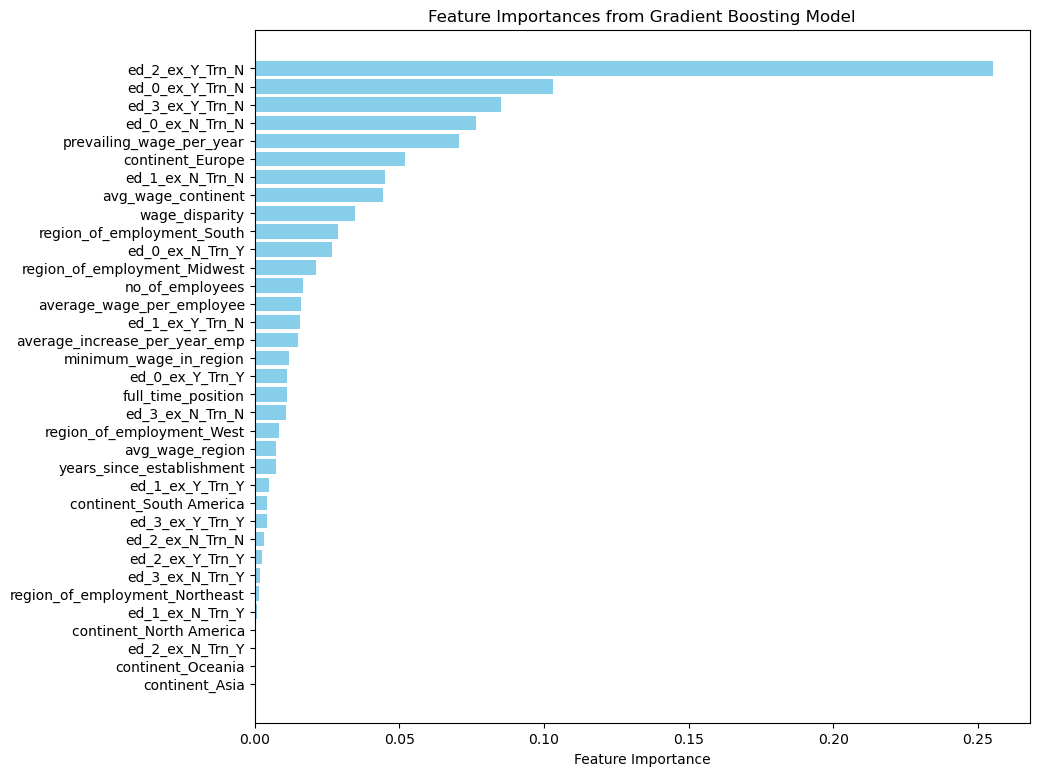

In [95]:

# Feature importances from the trained model
importances = gb_model.feature_importances_

# Get indices that would sort the feature importances in descending order
indices = np.argsort(importances)[::-1]  # Sort from highest to lowest

# Get the feature names sorted by importance (if using pandas DataFrame)
feature_names = X.columns[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 9))
plt.barh(feature_names, importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Gradient Boosting Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [96]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define hyperparameter search spaces for each model

# Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Bagging Classifier
bagging_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],  # Add this for bootstrapping
    'bootstrap_features': [True, False],  # Add this for feature bootstrapping
    'oob_score': [True, False],  # Whether to use out-of-bag samples to estimate generalization error
    'n_jobs': [-1],  # Parallelize computations using all processors
    'random_state': [42],  # Ensure reproducibility
}

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'oob_score': [True, False],
    'random_state': [42]
}

# AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['log_loss', 'exponential'],  # Fixed loss parameter
    'random_state': [42],
    'criterion': ['friedman_mse', 'squared_error'], # Adds control over the loss function used
    'ccp_alpha': [0.001, 0.01, 0.1],  # Quantile loss for robust regression
    'min_impurity_decrease': [0.0, 0.1, 0.2],  # Prevent overfitting
    'max_leaf_nodes': [None, 10, 20, 30],  # Limiting the number of leaf nodes for trees
    'warm_start': [True, False],  # Continue training from where the last fitting stopped
    'validation_fraction': [0.1, 0.2, 0.3],  # Fraction of training data used for early stopping
    'n_iter_no_change': [5, 10],  # Early stopping rounds for validation
    'tol': [1e-4, 1e-3],  # Tolerance for optimization
}


# Function to perform RandomizedSearchCV and evaluate the model
def tune_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val):
    # Stratified K-Fold Cross-validation for better performance on imbalanced data
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=cv, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Best model after tuning
    best_model = random_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_val)

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    return best_model, accuracy, precision, recall, f1, cm

# Function to print performance metrics
def print_performance():
    print("Performance Metrics on Tuned Models:")
    print(f"Decision Tree Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1: {f1_dt:.4f}")
    print(f"Bagging Accuracy: {accuracy_bagging:.4f}, Precision: {precision_bagging:.4f}, Recall: {recall_bagging:.4f}, F1: {f1_bagging:.4f}")
    print(f"Random Forest Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")
    print(f"AdaBoost Accuracy: {accuracy_ada:.4f}, Precision: {precision_ada:.4f}, Recall: {recall_ada:.4f}, F1: {f1_ada:.4f}")
    print(f"Gradient Boost Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1: {f1_gb:.4f}")

# Tune and evaluate each model on the Original Data
print("### Tuning and Evaluating Models on Original Data ###")

# Decision Tree
dt_best, accuracy_dt, precision_dt, recall_dt, f1_dt, cm_dt = tune_and_evaluate(
    DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_original, y_train_original, X_val_original, y_val_original)

# Bagging
bagging_best, accuracy_bagging, precision_bagging, recall_bagging, f1_bagging, cm_bagging = tune_and_evaluate(
    BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42), bagging_param_grid, X_train_original, y_train_original, X_val_original, y_val_original)

# Random Forest
rf_best, accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = tune_and_evaluate(
    RandomForestClassifier(random_state=42), rf_param_grid, X_train_original, y_train_original, X_val_original, y_val_original)

# AdaBoost
ada_best, accuracy_ada, precision_ada, recall_ada, f1_ada, cm_ada = tune_and_evaluate(
    AdaBoostClassifier(random_state=42), ada_param_grid, X_train_original, y_train_original, X_val_original, y_val_original)

# Gradient Boosting
gb_best, accuracy_gb, precision_gb, recall_gb, f1_gb, cm_gb = tune_and_evaluate(
    GradientBoostingClassifier(random_state=42), gb_param_grid, X_train_original, y_train_original, X_val_original, y_val_original)

# Print performance metrics for original data
print_performance()

# Now tune and evaluate each model on SMOTE Data
print("### Tuning and Evaluating Models on SMOTE Data ###")

# Decision Tree
dt_best, accuracy_dt, precision_dt, recall_dt, f1_dt, cm_dt = tune_and_evaluate(
    DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_smote, y_train_smote, X_val_original, y_val_original)

# Bagging
bagging_best, accuracy_bagging, precision_bagging, recall_bagging, f1_bagging, cm_bagging = tune_and_evaluate(
    BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42), bagging_param_grid, X_train_smote, y_train_smote, X_val_original, y_val_original)

# Random Forest
rf_best, accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = tune_and_evaluate(
    RandomForestClassifier(random_state=42), rf_param_grid, X_train_smote, y_train_smote, X_val_original, y_val_original)

# AdaBoost
ada_best, accuracy_ada, precision_ada, recall_ada, f1_ada, cm_ada = tune_and_evaluate(
    AdaBoostClassifier(random_state=42), ada_param_grid, X_train_smote, y_train_smote, X_val_original, y_val_original)

# Gradient Boosting
gb_best, accuracy_gb, precision_gb, recall_gb, f1_gb, cm_gb = tune_and_evaluate(
    GradientBoostingClassifier(random_state=42), gb_param_grid, X_train_smote, y_train_smote, X_val_original, y_val_original)

# Print performance metrics for SMOTE data
print_performance()

# Now tune and evaluate each model on Undersampled Data
print("### Tuning and Evaluating Models on Undersampled Data ###")

# Decision Tree
dt_best, accuracy_dt, precision_dt, recall_dt, f1_dt, cm_dt = tune_and_evaluate(
    DecisionTreeClassifier(random_state=42), dt_param_grid, X_train_under, y_train_under, X_val_original, y_val_original)

# Bagging
bagging_best, accuracy_bagging, precision_bagging, recall_bagging, f1_bagging, cm_bagging = tune_and_evaluate(
    BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42), bagging_param_grid, X_train_under, y_train_under, X_val_original, y_val_original)

# Random Forest
rf_best, accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = tune_and_evaluate(
    RandomForestClassifier(random_state=42), rf_param_grid, X_train_under, y_train_under, X_val_original, y_val_original)

# AdaBoost
ada_best, accuracy_ada, precision_ada, recall_ada, f1_ada, cm_ada = tune_and_evaluate(
    AdaBoostClassifier(random_state=42), ada_param_grid, X_train_under, y_train_under, X_val_original, y_val_original)

# Gradient Boosting
gb_best, accuracy_gb, precision_gb, recall_gb, f1_gb, cm_gb = tune_and_evaluate(
    GradientBoostingClassifier(random_state=42), gb_param_grid, X_train_under, y_train_under, X_val_original, y_val_original)

# Print performance metrics for undersampled data
print_performance()


### Tuning and Evaluating Models on Original Data ###
Performance Metrics on Tuned Models:
Decision Tree Accuracy: 0.7106, Precision: 0.7264, Recall: 0.9186, F1: 0.8113
Bagging Accuracy: 0.7241, Precision: 0.7437, Recall: 0.9041, F1: 0.8161
Random Forest Accuracy: 0.7408, Precision: 0.7636, Recall: 0.8939, F1: 0.8237
AdaBoost Accuracy: 0.7418, Precision: 0.7651, Recall: 0.8928, F1: 0.8240
Gradient Boost Accuracy: 0.7180, Precision: 0.7223, Recall: 0.9481, F1: 0.8199
### Tuning and Evaluating Models on SMOTE Data ###
Performance Metrics on Tuned Models:
Decision Tree Accuracy: 0.6531, Precision: 0.7846, Recall: 0.6723, F1: 0.7241
Bagging Accuracy: 0.7078, Precision: 0.7858, Recall: 0.7815, F1: 0.7837
Random Forest Accuracy: 0.7174, Precision: 0.8177, Recall: 0.7499, F1: 0.7823
AdaBoost Accuracy: 0.6898, Precision: 0.8229, Recall: 0.6905, F1: 0.7509
Gradient Boost Accuracy: 0.7035, Precision: 0.8079, Recall: 0.7375, F1: 0.7711
### Tuning and Evaluating Models on Undersampled Data ###
Per

## Observations:

### **Performance on Original Data (Tuned Models)**:
- **Gradient Boosting** and **AdaBoost** performed strongly, both with an **F1 score of around 0.82**.
- **Random Forest** also performed well with an **F1 score** of around **0.82**, though **AdaBoost** slightly outperformed it in recall (0.8928 vs 0.8939).
- **Decision Tree** improved significantly, achieving an **F1 score of 0.8113**, driven by a high recall (0.9186), although its precision (~0.73) remained lower.

### **Performance on SMOTE Data (Tuned Models)**:
- **Bagging** and **Random Forest** led in **F1 score** (~0.78) and recall, with **Bagging** (0.7837) slightly ahead of **Random Forest** (0.7823).
- **AdaBoost** and **Gradient Boosting** showed lower .l (~0.7).
- **Decision Tree** saw a notable performance drop after tuning, with **F1** at 0.7241.

### **Performance on Undersampled Data (Tuned Models)**:
- **Decision Tree** showed the best improvement with an **F1 score of 0.7689**, mainly due to strong precision (~0.81).
- **Random Forest** and **Bagging** performed similarly, with **Random Forest** edging out **Bagging** in **F1 score** (0.7597 vs 0.7485).
- **AdaBoost** and **Gradient Boosting** both saw performance declines, with **Gradient Boosting** having the lowest **F1 score of 0.7094**.

### **Key Insights**:
- **Tuning** significantly boosted **Decision Tree**’s performance, especially in **original data**, where it achieved high recall (~0.92) and improved F1.
- **AdaBoost** and **Gradient Boosting** remain top choices for **original data**, but slightly underperform with **SMOTE** and **undersampling**.
- **Bagging** and **Random Forest** are solid options, with **Bagging** slightly outperforming **Random Forest** on **SMOTE data**. **Random Forest** performs better on **original** and **undersampled data**.

### **Conclusion**:
- **For original data**, **AdaBoost** and **Gradient Boosting** are still the top picks with strong precision and recall.
- **For SMOTE data**, **Bagging** and **Random Forest** offer the best balance between precision and recall, with **Bagging** slightly ahead.
- **For undersampled data**, **Decision Tree** shows strong post-tuning performance, making it a viable option alongside **Random Forest**.

If **recall** is critical, **Gradient Boosting** and **AdaBoost** should be prioritized for **original data**. For **SMOTE** or **undersampling**, **Bagging** and **Random Forest** may offer the best results.all, or a balance of both.

## Suggestions :

To drive growth and optimize the visa approval process at **EasyVisa**, here’s a multifaceted strategy that combines data-driven insights with operational enhancements:

### 1. **Enhance Visa Approval Predictions with Machine Learning**
   - **Optimize Visa Predictions**: Refine the classification model used for predicting visa outcomes, improving accuracy in identifying potential approvals or denials based on key features like education, job experience, wage expectations, and employment region.
     - **Feature Engineering**: Investigate attributes such as “education_of_employee,” “prevailing_wage,” and “region_of_employment” to uncover patterns influencing visa approval.
     - **Model Enhancement**: Regularly update models with new.racy.
     - **Model Interpretability**: Invest in **explainable AI (XAI)** to provide transparency on the decision-making process, fostering trust with OFLC.

### 2. **Segment Applicants and Develop Targeted Profiles**
   - **Applicant Segmentation**: Apply clustering techniques (e.g., K-means, hierarchical) to categorize applicants by factors such as education, job experience, and wage expectations. This allows for targeted recommendations, helping employers focus on applicants most likely to be approved.
   - **Employer Targeting**: Create applicant profiles tailored to specific employers, identifying candidates who align with their recruitment needs and have higher chances of visa approval.

### 3. **Automate Workflow to Streamline Processing**
   - **Automated Application Screening**: Develop an automated system that processes applications based on machine learning predictions, reducing manual effort and speeding up approval times.
   - **Real-time Alerts**: Set up automated notifications when trends emerge (e.g., a surge in visa applications from certain industries or regions), allowing OFLC to adapt quickly to changes.

### 4. **Enhance Data Collection and Quality**
   - **Granular Data Collection**: Gather more detailed data on applicants, such as skill certifications, job-specific requirements, company size, and employee tenure, to improve model precision.
   - **Track Emerging Trends**: Collect data on growing sectors, countries, and educational backgrounds to anticipate future demand for foreign workers and adjust strategies accordingly.

### 5. **Provide Strategic Guidance to Improve Visa Approval Rates**
   - **Actionable Insights**: Share insights with applicants and employers to improve approval chances, such as aligning job experience or educational background with successful applications.
   - **Prevailing Wage Recommendations**: Suggest appropriate wage levels for employers based on industry standards, helping them stay compliant and reduce the risk of denial.

### 6. **Expand Market Reach**
   - **Target Emerging Regions and Sectors**: Use predictive modeling to identify regions or industries with increasing foreign worker demand, and target marketing efforts in these areas.
   - **Global Expansion**: Explore expanding services to countries or regions experiencing visa bottlenecks, attracting more applicants from areas with high demand for U.S. employment opportunities.

### 7. **Partner with Employers for Tailored Recruiting Solutions**
   - **Employer Partnerships**: Collaborate with employers who frequently hire foreign workers, offering data-driven insights to help them identify high-quality candidates and improve recruitment efficiency.
   - **Custom Solutions**: Develop specialized visa processing solutions for large employers (e.g., tech companies, healthcare providers), including bulk application processing and HR system integration.

### 8. **Monitor Key Metrics and Continuously Improve**
   - **Track Performance Metrics**: Monitor important business metrics like **visa approval rates**, **processing efficiency**, **model accuracy**, and **customer satisfaction** to identify areas for improvement.
   - **Customer Feedback**: Regularly collect feedback from both applicants and employers to refine services and enhance the overall visa application process.

### **Key Metrics to Track for Growth**:
   - **Visa Approval Accuracy**: Ensure model predictions match OFLC outcomes to maintain credibility.
   - **Processing Time Efficiency**: Measure time saved through automation and data-driven decisions.
   - **Customer Satisfaction**: Assess satisfaction levels of employers and applicants with the visa process.
   - **Application Volume Growth**: Track yearly application growth and identify factors driving increased volume.

By focusing on **data-driven automation**, **predictive accuracy**, and **targeted market expansion**, EasyVisa can not only streamline the visa approval process but also enhance its services, expand market reach, and achieve sustainable growth in a competitive landscape.

# Thank You!